In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
def percent_missing(df):
    percent_nan = df.isnull().sum()/len(df)*100
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

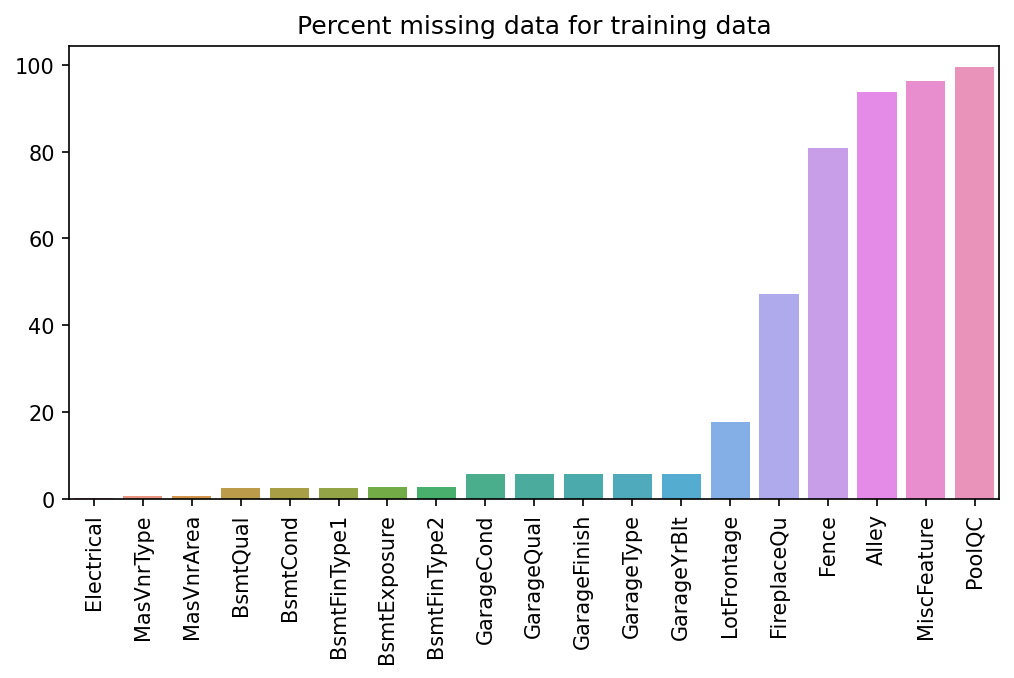

In [7]:
percent_nan = percent_missing(df)
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.title(label='Percent missing data for training data');

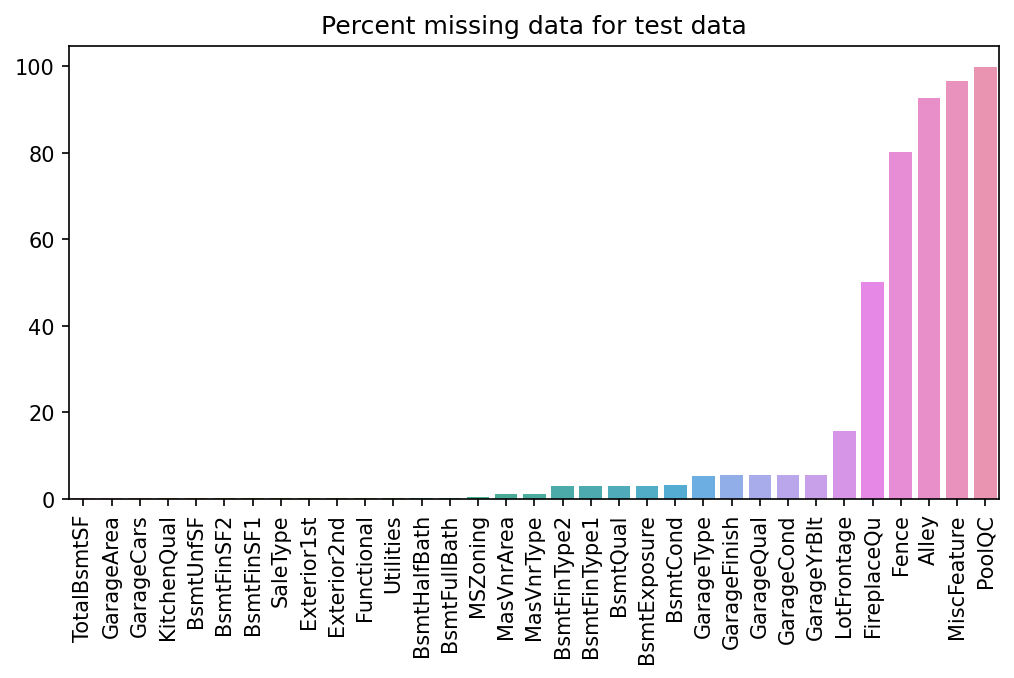

In [8]:
percent_nan = percent_missing(test)
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.title(label='Percent missing data for test data');

In [9]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','Id'],axis=1)
test = test.drop(['PoolQC','MiscFeature','Alley','Fence','Id'],axis=1)

In [10]:
df = df.dropna(axis=0, subset = ['Electrical'])

df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

bsmt_missing = ['BsmtQual','BsmtCond','BsmtFinType1','BsmtExposure','BsmtFinType2']
df[bsmt_missing] = df[bsmt_missing].fillna('None')
garage_missing = ['GarageType','GarageFinish','GarageQual','GarageCond']
df[garage_missing] = df[garage_missing].fillna('None')

test[bsmt_missing] = test[bsmt_missing].fillna('None')
test[garage_missing] = test[garage_missing].fillna('None')

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

In [11]:
def percent_missing(df):
    percent_nan = df.isnull().sum()/len(df)*100
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

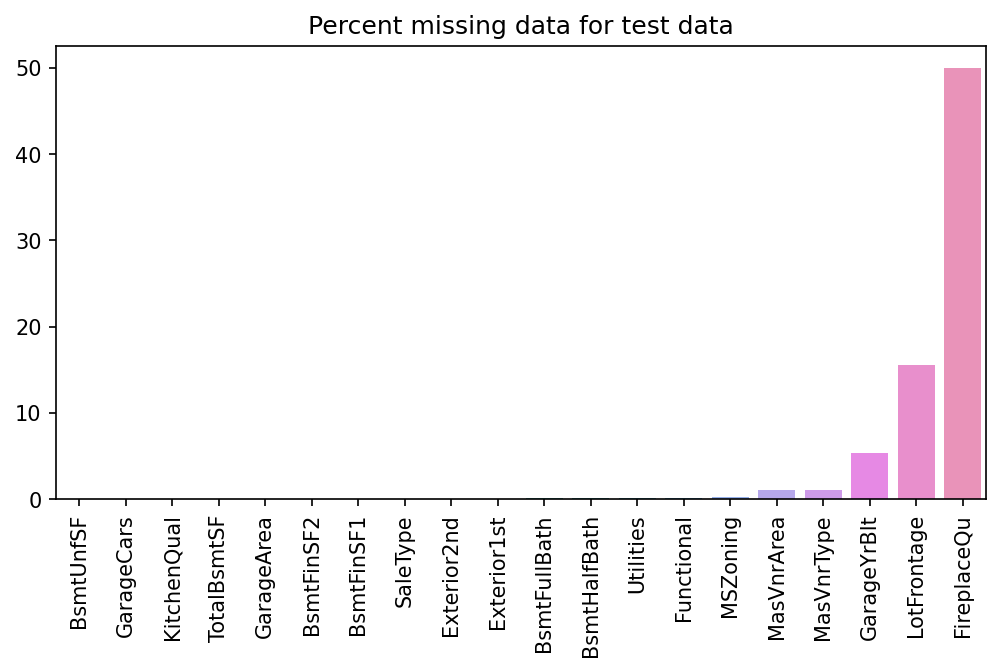

In [12]:
percent_nan = percent_missing(test)
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.title(label='Percent missing data for test data');

In [13]:
missing_col_num = ['BsmtUnfSF','GarageCars','TotalBsmtSF','GarageArea','BsmtFinSF2','BsmtFinSF1','BsmtFullBath','BsmtHalfBath']
test[missing_col_num] = test[missing_col_num].fillna(0)
test['SaleType'] = test['SaleType'].fillna('None')
test = test.dropna(axis=0,subset=['Exterior1st','Exterior2nd'])
test = test.dropna(axis=0,subset=['KitchenQual','SaleType'])

In [14]:
test.shape

(1457, 75)

In [15]:
df.shape

(1459, 76)

In [16]:
test['Utilities'].isnull().sum()/len(test)*100

0.13726835964310227

In [17]:
test = test.dropna(axis=0,subset=['Utilities','Functional','MSZoning'])

In [18]:
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

In [19]:
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

In [20]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

In [21]:
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [22]:
percent_nan = percent_missing(test)
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.title(label='Percent missing data for test data');

ValueError: min() arg is an empty sequence

<Figure size 1200x600 with 0 Axes>

## Transform data

In [47]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

In [67]:
my_object_df = df.select_dtypes(include='object')
my_numeric_df = df.select_dtypes(exclude='object')
my_object_test = test.select_dtypes(include='object')
my_numeric_test = test.select_dtypes(exclude='object')
my_object_df = pd.get_dummies(my_object_df,drop_first=True)
my_object_test = pd.get_dummies(my_object_test,drop_first=True)

In [56]:
#my_numeric_df.shape

In [57]:
#my_numeric_test.shape

In [68]:
final_df = pd.concat([my_object_df,my_numeric_df],axis=1)
final_test = pd.concat([my_object_test,my_numeric_test],axis=1)

In [69]:
final_df.shape, final_test.shape

((1459, 260), (1451, 244))

In [70]:
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [85]:
#model.fit(scaled_X,y)

In [84]:
#len(scaled_test.scale_)

In [99]:
train_cols = X.columns
test_cols = final_test.columns

common_cols = test_cols.intersection(train_cols)
train_not_test = test_cols.difference(train_cols)

In [100]:
train_not_test

Index(['MSSubClass_150', 'SaleType_None'], dtype='object')

In [96]:
list = ['Exterior1st_CBlock','Condition2_RRAe','Condition2_RRAn','Condition2_RRNn','Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other','GarageQual_Fa','Heating_GasA','Heating_OthW','HouseStyle_2.5Fin','MSZoning_FV','MSZoning_RH','RoofMatl_CompShg',
       'RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','Utilities_NoSeWa']
for col in list:
    final_test[col] = 0

In [101]:
list = ['MSSubClass_150', 'SaleType_None']
for col in list:
    X[col] = 0

In [104]:
X.shape, final_test.shape

((1459, 261), (1451, 261))

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [111]:
scaler.fit(X)

StandardScaler()

In [113]:
scaled_X = scaler.transform(X)

In [114]:
scaled_test = scaler.fit(final_test)

In [117]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [118]:
model.fit(X,y)

LinearRegression()

In [119]:
pred = model.predict(final_test)

In [120]:
pred

array([4.98877151e+07, 1.10536895e+08, 5.54789080e+07, ...,
       6.75185848e+07, 5.04101708e+07, 5.62553711e+07])